<a href="https://colab.research.google.com/github/lukehartfield/Linear-Programming-Portfolio-Optimization/blob/main/Optimization_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Team Members:

Peyton Gibbs

Luke Hartfield

Pranit Yadav

Vyshnavi Maringanti

In [ ]:
pip install gurobipy

In [ ]:
import gurobipy as gp
import pandas as pd
import numpy as np
from gurobipy import GRB
import matplotlib.pyplot as plt
import seaborn as sns

# Import Stock Returns Excel

Note: Read in files.

In [ ]:
from google.colab import files
uploaded = files.upload()
stocks2019 = pd.read_csv('stocks2019.csv')
stocks2020 = pd.read_csv('stocks2020.csv')

Saving stocks2019.csv to stocks2019 (2).csv
Saving stocks2020.csv to stocks2020 (2).csv


In [ ]:
stocks2019

,X,NDX,ATVI,ADBE,AMD,ALXN,ALGN,GOOGL,GOOG,AMZN,...,TCOM,ULTA,VRSN,VRSK,VRTX,WBA,WDAY,WDC,XEL,XLNX
0,2019-01-02,6360.870117,46.350380,224.570007,18.830000,98.050003,202.119995,1054.680054,1045.849976,1539.130005,...,27.590000,247.970001,147.759995,107.364159,164.080002,63.920757,159.740005,36.312473,46.041862,84.600266
1,2019-01-03,6147.129883,44.704514,215.699997,17.049999,100.209999,184.779999,1025.469971,1016.059998,1500.280029,...,26.959999,243.360001,142.589996,104.083450,163.729996,63.253742,154.020004,33.835327,45.860447,81.414970
2,2019-01-04,6422.669922,46.488358,226.190002,19.000000,106.000000,186.710007,1078.069946,1070.709961,1575.390015,...,28.549999,255.029999,148.970001,108.678413,172.699997,65.358139,163.350006,35.268467,46.309223,85.184715
3,2019-01-07,6488.250000,47.799141,229.259995,20.570000,107.940002,189.919998,1075.920044,1068.390015,1629.510010,...,29.180000,271.000000,151.399994,108.787117,175.850006,65.733910,163.500000,36.521275,46.108707,87.434891
4,2019-01-08,6551.850098,49.247898,232.679993,20.750000,108.610001,192.949997,1085.369995,1076.280029,1656.579956,...,29.480000,276.000000,156.919998,109.755516,178.190002,67.049149,166.949997,36.170105,46.643410,85.769180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,2019-12-23,8696.009766,58.505219,328.950012,45.459999,110.459999,278.140015,1350.630005,1348.839966,1793.000000,...,34.660000,253.020004,192.429993,148.814499,219.979996,56.759140,165.610001,61.401749,61.415092,97.683632
247,2019-12-24,8699.509766,58.425743,329.640015,46.540001,110.279999,277.890015,1344.430054,1343.560059,1789.209961,...,34.470001,252.490005,192.750000,148.436371,220.559998,56.545940,166.190002,60.941479,61.655396,97.278679
248,2019-12-26,8778.309570,58.505219,331.200012,46.630001,108.930000,278.260010,1362.469971,1360.400024,1868.770020,...,34.570000,251.330002,193.710007,148.098038,220.250000,57.078938,165.360001,61.499676,61.586739,97.466339
249,2019-12-27,8770.980469,58.803261,330.790009,46.180000,108.550003,277.640015,1354.640015,1351.890015,1869.800049,...,34.610001,253.169998,194.050003,147.849274,220.970001,57.195225,165.850006,60.843552,61.910412,97.209534


In [ ]:
stocks2020

,Unnamed: 0,NDX,ATVI,ADBE,AMD,ALXN,ALGN,GOOGL,GOOG,AMZN,...,TCOM,ULTA,VRSN,VRSK,VRTX,WBA,WDAY,WDC,XEL,XLNX
0,1/2/20,8872.219727,58.266792,334.429993,49.099998,107.839996,283.679993,1368.680054,1367.369995,1898.010010,...,36.970001,254.550003,196.729996,150.167465,219.449997,56.046688,167.460007,64.771545,60.782249,100.115349
1,1/3/20,8793.900391,58.286655,331.809998,48.599998,106.410004,280.440002,1361.520020,1360.660034,1874.969971,...,36.180000,250.169998,200.880005,151.628220,217.979996,56.046688,168.440002,63.774597,61.074562,97.810677
2,1/6/20,8848.519531,59.349670,333.709991,48.389999,106.580002,285.880005,1397.810059,1394.209961,1902.880005,...,35.689999,250.949997,202.740005,151.976013,224.029999,56.530506,169.490005,62.550629,60.986866,95.771927
3,1/7/20,8846.450195,59.945747,333.390015,48.250000,106.849998,283.059998,1395.109985,1393.339966,1906.859985,...,37.330002,253.089996,203.210007,153.247955,223.789993,56.245903,172.949997,66.785164,60.860199,97.958405
4,1/8/20,8912.370117,59.488754,337.869995,47.830002,108.580002,286.000000,1405.040039,1404.319946,1891.969971,...,36.869999,258.000000,204.149994,154.658997,231.089996,52.963551,178.710007,67.752487,60.801735,97.682640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,12/23/20,12653.139650,90.209999,496.910004,91.550003,153.240005,525.000000,1728.229980,1732.380005,3185.270020,...,32.630001,268.459991,214.009995,199.970001,235.839996,39.493504,248.759995,49.930000,64.309998,141.990005
248,12/24/20,12711.009770,90.959999,499.859985,91.809998,152.630005,528.030029,1734.160034,1738.849976,3172.689941,...,31.990000,264.640015,214.589996,201.229996,234.460007,39.245865,248.759995,49.919998,64.629997,141.990005
249,12/28/20,12838.860350,91.430000,498.950012,91.599998,154.360001,520.859985,1773.959961,1776.089966,3283.959961,...,31.900000,278.170013,216.800003,207.979996,232.470001,39.285488,241.919998,50.060001,65.320000,141.520004
250,12/29/20,12843.490230,91.370003,502.109985,90.620003,155.350006,520.450012,1757.760010,1758.719971,3322.000000,...,32.029999,277.339996,215.630005,205.669998,233.490005,39.037846,237.720001,48.290001,65.419998,139.899994


In [ ]:
# NEW (insert before current Cell 6)
# Keep the NDX series so we can compute its CVaR later
ndx_2019 = stocks2019['NDX'].pct_change().dropna()
ndx_2020 = stocks2020['NDX'].pct_change().dropna()


In [ ]:
stocks2019 = stocks2019.drop('NDX', axis=1)
stocks2020 = stocks2020.drop('NDX', axis=1)


In [ ]:
stocks2020.rename(columns={'Unnamed: 0': 'X'}, inplace=True)

stocks2020['X'] = pd.to_datetime(stocks2020['X'])  # Convert to datetime
stocks2020 = stocks2020.set_index('X')             # Set as index
stocks2020 = stocks2020.sort_index()               # Ensure it's sorted by date

/tmp/ipython-input-2653824879.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  stocks2020['X'] = pd.to_datetime(stocks2020['X'])  # Convert to datetime


In [ ]:

stocks2019['X'] = pd.to_datetime(stocks2019['X'])  # Convert to datetime
stocks2019 = stocks2019.set_index('X')             # Set as index
stocks2019 = stocks2019.sort_index()               # Ensure it's sorted by date

In [ ]:
stocks2019.head(5)
stocks2020.head(5)

,ATVI,ADBE,AMD,ALXN,ALGN,GOOGL,GOOG,AMZN,AMGN,ADI,...,TCOM,ULTA,VRSN,VRSK,VRTX,WBA,WDAY,WDC,XEL,XLNX
X,,,,,,,,,,,,,,,,,,,,,
2020-01-02,58.266792,334.429993,49.099998,107.839996,283.679993,1368.680054,1367.369995,1898.010010,231.917572,117.996941,...,36.970001,254.550003,196.729996,150.167465,219.449997,56.046688,167.460007,64.771545,60.782249,100.115349
2020-01-03,58.286655,331.809998,48.599998,106.410004,280.440002,1361.520020,1360.660034,1874.969971,230.343124,115.919769,...,36.180000,250.169998,200.880005,151.628220,217.979996,56.046688,168.440002,63.774597,61.074562,97.810677
2020-01-06,59.349670,333.709991,48.389999,106.580002,285.880005,1397.810059,1394.209961,1902.880005,232.110748,114.557854,...,35.689999,250.949997,202.740005,151.976013,224.029999,56.530506,169.490005,62.550629,60.986866,95.771927
2020-01-07,59.945747,333.390015,48.250000,106.849998,283.059998,1395.109985,1393.339966,1906.859985,229.927765,117.164116,...,37.330002,253.089996,203.210007,153.247955,223.789993,56.245903,172.949997,66.785164,60.860199,97.958405
2020-01-08,59.488754,337.869995,47.830002,108.580002,286.000000,1405.040039,1404.319946,1891.969971,230.101654,118.222298,...,36.869999,258.000000,204.149994,154.658997,231.089996,52.963551,178.710007,67.752487,60.801735,97.682640


# Decision Variables

In [ ]:
# FIRST: Convert price data to returns
print("Converting prices to returns...")
returns2019 = stocks2019.pct_change().dropna()  # Calculate percentage returns and remove NaN
returns2020 = stocks2020.pct_change().dropna()

print(f"Returns shape - 2019: {returns2019.shape}, 2020: {returns2020.shape}")

# Get parameters
tickers = returns2019.columns.tolist()
n = len(tickers)
q = len(returns2019)  # number of trading days

# Convert to numpy arrays
Y = returns2019.values  # Use RETURNS, not prices
mean_returns = returns2019.mean().values  # Mean daily returns

# CVaR parameters
beta = 0.95
R = 0.0002  # 0.02% minimum daily return
cvar_coeff = 1.0 / ((1.0 - beta) * q)

print(f"Using {n} stocks, {q} trading days")
print(f"Sample mean returns: {mean_returns[:5]}")

Converting prices to returns...
Returns shape - 2019: (250, 100), 2020: (251, 100)
Using 100 stocks, 250 trading days
Sample mean returns: [0.00118434 0.00163343 0.0040971  0.00063549 0.00169639]


/tmp/ipython-input-3043135426.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(annual_returns_2019, shade=True, label="2019")
/tmp/ipython-input-3043135426.py:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(annual_returns_2020, shade=True, label="2020")


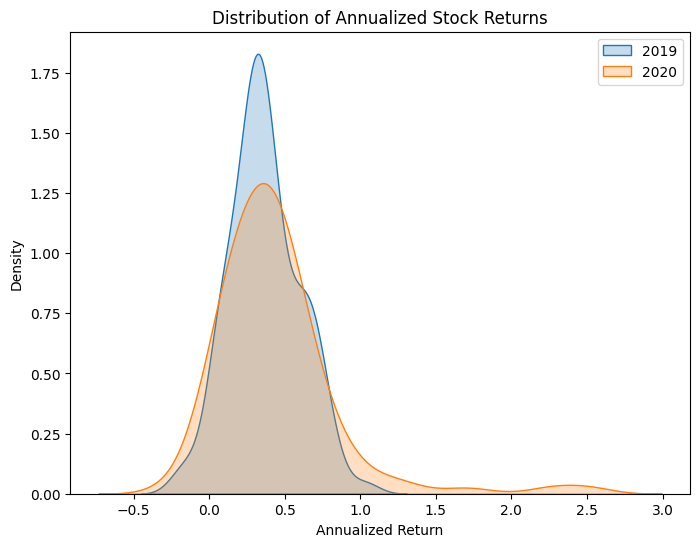

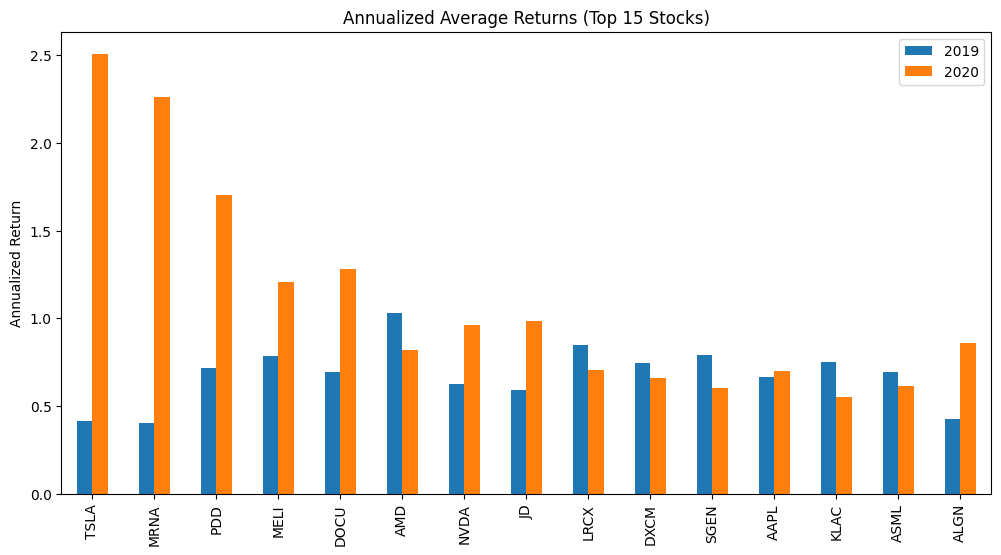

2019 Mean Return: 0.36359681642168473
2019 Std Dev: 0.2293966951084281
2020 Mean Return: 0.43863684757335797
2020 Std Dev: 0.40854689351314055


In [ ]:
# Compute annualized average returns
annual_returns_2019 = returns2019.mean() * 252
annual_returns_2020 = returns2020.mean() * 252

# Combine into one DataFrame
avg_returns = pd.DataFrame({
    "2019": annual_returns_2019,
    "2020": annual_returns_2020
})

# ----- Visualization 1: Distribution of returns -----
plt.figure(figsize=(8,6))
sns.kdeplot(annual_returns_2019, shade=True, label="2019")
sns.kdeplot(annual_returns_2020, shade=True, label="2020")
plt.title("Distribution of Annualized Stock Returns")
plt.xlabel("Annualized Return")
plt.ylabel("Density")
plt.legend()
plt.show()

# ----- Visualization 2: Top 15 stocks by average -----
top_stocks = avg_returns.mean(axis=1).nlargest(15).index
avg_returns.loc[top_stocks].plot(kind="bar", figsize=(12,6))
plt.title("Annualized Average Returns (Top 15 Stocks)")
plt.ylabel("Annualized Return")
plt.show()

# Summary stats for report
print("2019 Mean Return:", annual_returns_2019.mean())
print("2019 Std Dev:", annual_returns_2019.std())
print("2020 Mean Return:", annual_returns_2020.mean())
print("2020 Std Dev:", annual_returns_2020.std())

In [ ]:
stockMod = gp.Model("CVaR_Portfolio")

Restricted license - for non-production use only - expires 2026-11-23


In [ ]:
# Decision variables
x = stockMod.addVars(n, lb=0, ub=1, name="x")  # Portfolio weights (0 to 1)
alpha = stockMod.addVar(lb=-GRB.INFINITY, name="alpha")  # VaR proxy
u = stockMod.addVars(q, lb=0, name="u")  # Auxiliary variables

In [ ]:
# Objective Function: Minimize CVaR
stockMod.setObjective(
    alpha + cvar_coeff * gp.quicksum(u[k] for k in range(q)),
    GRB.MINIMIZE
)

# Constraints
# 1. Portfolio weights sum to 1
stockMod.addConstr(
    gp.quicksum(x[j] for j in range(n)) == 1.0,
    name="budget"
)

# 2. Expected return constraint
stockMod.addConstr(
    gp.quicksum(mean_returns[j] * x[j] for j in range(n)) >= R,
    name="min_return"
)

# 3. CVaR auxiliary constraints
for k in range(q):
    stockMod.addConstr(
        u[k] >= -gp.quicksum(Y[k, j] * x[j] for j in range(n)) - alpha,
        name=f"tail_{k}"
    )

In [ ]:
print("Solving optimization...")
stockMod.optimize()

# Results
if stockMod.status == GRB.OPTIMAL:
    x_opt = {tickers[j]: x[j].X for j in range(n)}
    print("alpha* (VaR proxy):", alpha.X)
    print("Objective (CVaR):", stockMod.ObjVal)

    # Show top weights
    sorted_weights = sorted(x_opt.items(), key=lambda kv: kv[1], reverse=True)
    print("Top 10 weights:")
    for ticker, weight in sorted_weights[:10]:
        if weight > 1e-6:
            print(f"  {ticker}: {weight:.4f} ({weight*100:.2f}%)")

    # Verify constraints
    total_weight = sum(x_opt.values())
    expected_return = sum(mean_returns[j] * x[j].X for j in range(n))
    print(f"\nConstraint check:")
    print(f"  Total weight: {total_weight:.6f}")
    print(f"  Expected return: {expected_return:.6f} (required: {R})")
else:
    print(f"Optimization failed with status: {stockMod.status}")

Solving optimization...
Gurobi Optimizer version 12.0.3 build v12.0.3rc0 (linux64 - "Ubuntu 22.04.4 LTS")

CPU model: AMD EPYC 7B12, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 252 rows, 351 columns and 25604 nonzeros
Model fingerprint: 0x2a87650d
Coefficient statistics:
  Matrix range     [2e-05, 1e+00]
  Objective range  [8e-02, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [2e-04, 1e+00]
Presolve time: 0.01s
Presolved: 252 rows, 351 columns, 25604 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0      handle free variables                          0s
     147    1.1089668e-02   0.000000e+00   0.000000e+00      0s

Solved in 147 iterations and 0.02 seconds (0.02 work units)
Optimal objective  1.108966829e-02
alpha* (VaR proxy): 0.008500418524989683
Objective (CVaR): 0.011089668286016468
Top 10 weights:
  XEL: 0.3039 (30.39%)
  CHTR: 0.2650 (26.50%)
  A

# Q2

In [ ]:
#put 2019 weights in same ticker order
tickers = returns2019.columns.tolist()
w2019 = np.array([x[j].X for j in range(len(tickers))])

#CVAR helper for returns and weights
def cvar_for_weights(returns_df, w, beta=0.95):
    r = returns_df.values @ w
    losses = -r
    a = np.quantile(losses, beta)
    cvar = a + np.maximum(losses - a, 0).mean() / (1 - beta)
    return a, cvar

#2019 CVAR measured on 2020 data
alpha20, cvar20 = cvar_for_weights(returns2020, w2019, beta=0.95)
print(f"Out-of-sample 2020: VaR={alpha20:.6f}, CVaR={cvar20:.6f}")

#NDX CVAR on 2019 and 2020
def cvar_series(s, beta=0.95):
    losses = -s.values
    a = np.quantile(losses, beta)
    return a, a + np.maximum(losses - a, 0).mean() / (1 - beta)

ndx_a19, ndx_c19 = cvar_series(ndx_2019, 0.95)
ndx_a20, ndx_c20 = cvar_series(ndx_2020, 0.95)
print(f"NDX 2019: VaR={ndx_a19:.6f}, CVaR={ndx_c19:.6f}")
print(f"NDX 2020: VaR={ndx_a20:.6f}, CVaR={ndx_c20:.6f}")

Out-of-sample 2020: VaR=0.025250, CVaR=0.046568
NDX 2019: VaR=0.015955, CVaR=0.024753
NDX 2020: VaR=0.038977, CVaR=0.056499


Our 2019 portfolio is considered in-sample and our 2020 portfolio is considered out-of-sample in this scenario. Our 2019 portfolio had low risk in 2019, as shown by its CVAR of 0.0111. The 2020 CVAR got much worse at 0.0466, which shows that our tail risk increased. The portfolio did not stay successful across the years, which shows the non-stationarity of the market. Therefore, it is not a good idea to stick with the same portfolio over the years. The CVAR of the NDX index in 2019 and 2020 is 0.0248 and 0.0565, respectively. Our portfolio's CVAR was lower than the NDX in 2020, which means it still beat the benchmark on tail risk.

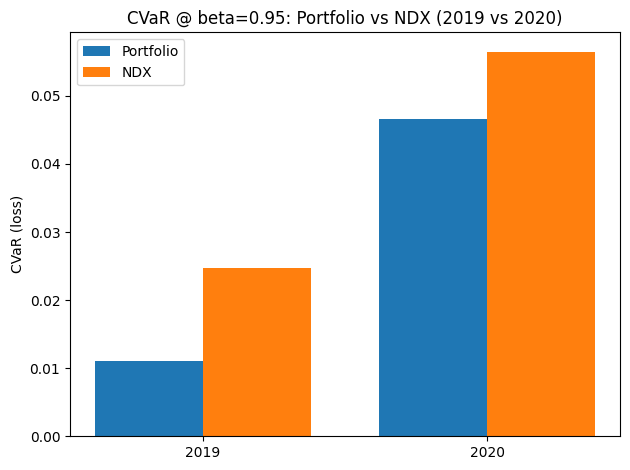

In [ ]:
#create graph
BETA = 0.95

#CVaR for portfolio (2019 weights) on 2019 and 2020
_, c_port_2019 = cvar_for_weights(returns2019, w2019, beta=BETA)
_, c_port_2020 = cvar_for_weights(returns2020, w2019, beta=BETA)

#CVaR for NDX in 2019 and 2020
_, c_ndx_2019 = cvar_series(ndx_2019, BETA)
_, c_ndx_2020 = cvar_series(ndx_2020, BETA)

#double bar chart
labels = ["2019", "2020"]
x = np.arange(len(labels))
width = 0.38

plt.figure()
plt.bar(x - width/2, [c_port_2019, c_port_2020], width, label="Portfolio")
plt.bar(x + width/2, [c_ndx_2019, c_ndx_2020], width, label="NDX")
plt.xticks(x, labels)
plt.ylabel("CVaR (loss)")
plt.title(f"CVaR @ beta={BETA}: Portfolio vs NDX (2019 vs 2020)")
plt.legend()
plt.tight_layout()
plt.show()

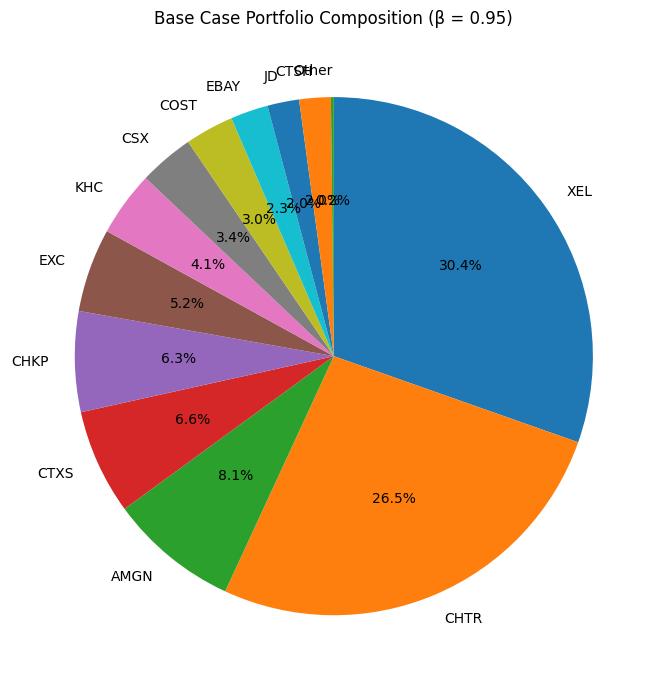

In [ ]:

# Base case weights
w_base = pd.Series(w2019, index=tickers)
w_base = w_base[w_base > 1e-6].sort_values(ascending=False)

# Top holdings as slices, group tiny ones into "Other"
topN = 12
w_display = w_base.copy()
if len(w_display) > topN:
    other = w_display.iloc[topN:].sum()
    w_display = w_display.iloc[:topN]
    w_display["Other"] = other

plt.figure(figsize=(7,7))
plt.pie(w_display.values, labels=w_display.index,
        autopct="%1.1f%%", startangle=90, counterclock=False)
plt.title("Base Case Portfolio Composition (β = 0.95)")
plt.tight_layout()
plt.show()


# Q3

In [ ]:
#optimize for 2019 for new betas
def solve_cvar(Y_df, mean_ret, R_min, beta):
    q, n = Y_df.shape
    coeff = 1 / ((1 - beta) * q)

    m = gp.Model(f"beta_{beta}")
    x2 = m.addVars(n, lb=0, ub=1, name="x")
    a  = m.addVar(lb=-gp.GRB.INFINITY, name="alpha")
    u  = m.addVars(q, lb=0, name="u")

    m.setObjective(a + coeff * gp.quicksum(u[k] for k in range(q)), gp.GRB.MINIMIZE)
    m.addConstr(gp.quicksum(x2[j] for j in range(n)) == 1)
    m.addConstr(gp.quicksum(mean_ret[j] * x2[j] for j in range(n)) >= R_min)

    Y = Y_df.values
    for k in range(q):
        m.addConstr(u[k] >= -gp.quicksum(Y[k, j] * x2[j] for j in range(n)) - a)

    m.optimize()
    w = np.array([x2[j].X for j in range(n)])
    return w, a.X, m.ObjVal

#use β of 0.90 and 0.99
sol = {}
for b in [0.90, 0.95, 0.99]:
    w, a, c = solve_cvar(returns2019, mean_returns, R, b)
    sol[b] = w
    print(f"beta={b}: alpha={a:.6f}, CVaR={c:.6f}")

#top 10 names for each β
def show_top(tickers, w, k=10):
    for name, wt in sorted(zip(tickers, w), key=lambda t: t[1], reverse=True)[:k]:
        if wt > 1e-6:
            print(f"  {name}: {wt*100:.2f}%")

print("\nTop 10 @ beta=0.90"); show_top(tickers, sol[0.90])
print("\nTop 10 @ beta=0.95"); show_top(tickers, sol[0.95])
print("\nTop 10 @ beta=0.99"); show_top(tickers, sol[0.99])

Gurobi Optimizer version 12.0.3 build v12.0.3rc0 (linux64 - "Ubuntu 22.04.4 LTS")

CPU model: AMD EPYC 7B12, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 252 rows, 351 columns and 25604 nonzeros
Model fingerprint: 0x8e6b75bd
Coefficient statistics:
  Matrix range     [2e-05, 1e+00]
  Objective range  [4e-02, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [2e-04, 1e+00]
Presolve time: 0.01s
Presolved: 252 rows, 351 columns, 25604 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0      handle free variables                          0s
     163    8.9000577e-03   0.000000e+00   0.000000e+00      0s

Solved in 163 iterations and 0.03 seconds (0.02 work units)
Optimal objective  8.900057744e-03
beta=0.9: alpha=0.004871, CVaR=0.008900
Gurobi Optimizer version 12.0.3 build v12.0.3rc0 (linux64 - "Ubuntu 22.04.4 LTS")

CPU model: AMD EPYC 7B12, instruction set [SSE2

A β=0.90, 0.95, and 0.99 look at the worst 10%, 5%, and 1% days, respectively. A higher β means that the portfolio may get more strict as we will be looking at the extremely bad days. Increasing the β in 2019 increases the CVAR from 0.0089 to 0.0111 to 0.0125. In terms of portfolio allocation, β=0.99 is more concentrated in defensive stocks with XEL rising to 45%, compared to β=0.90 which is a more diversified portfolio. A higher β pretects against losses, which is why the portfolio allocation assigns higher weights to utilities and consumer goods that are bought even when the economy is bad.

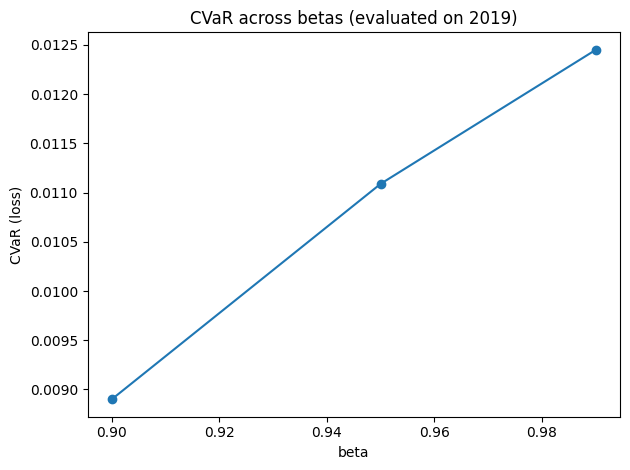

In [ ]:
#create graph
BETAS = sorted(sol.keys())

#CVaR on 2019 for each beta using the saved weights
cvars_2019 = []
for b in BETAS:
    _, c = cvar_for_weights(returns2019, sol[b], beta=b)
    cvars_2019.append(c)

plt.figure()
plt.plot(BETAS, cvars_2019, marker="o")
plt.xlabel("beta")
plt.ylabel("CVaR (loss)")
plt.title("CVaR across betas (evaluated on 2019)")
plt.tight_layout()
plt.show()

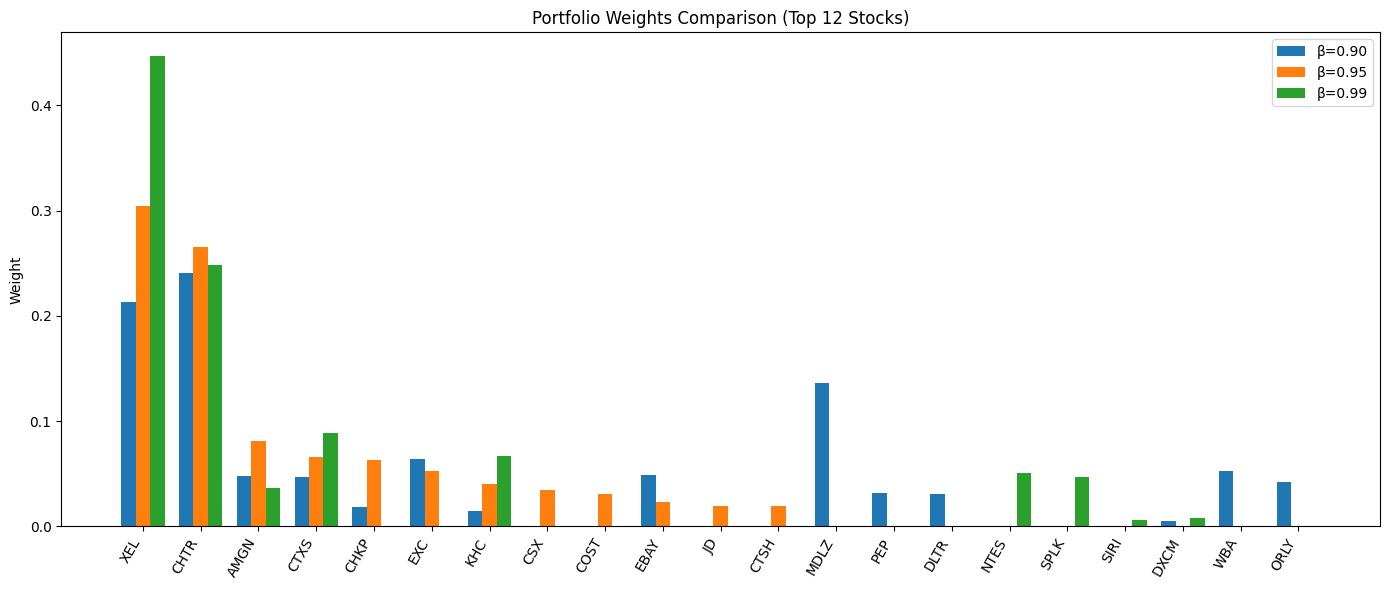

In [ ]:

def weights_series(weights_array, tickers):
    s = pd.Series(weights_array, index=tickers)
    s = s[s > 1e-6].sort_values(ascending=False)
    if s.sum() > 0:
        s = s / s.sum()
    return s

# Collect top holdings across betas
betas = [0.90, 0.95, 0.99]
topK = 12
names = set()
for b in betas:
    s = weights_series(sol[b], tickers)
    names |= set(s.index[:topK])
names = list(names)

# Build DataFrame of weights
df_w = pd.DataFrame({f"β={b:.2f}": weights_series(sol[b], tickers).reindex(names).fillna(0)
                     for b in betas})

# Sort rows by β=0.95 weights
df_w = df_w.loc[df_w["β=0.95"].sort_values(ascending=False).index]

# Plot grouped bars
x = np.arange(len(df_w.index))
width = 0.25

plt.figure(figsize=(14,6))
for i, b in enumerate(betas):
    plt.bar(x + (i-1)*width, df_w[f"β={b:.2f}"].values, width, label=f"β={b:.2f}")

plt.xticks(x, df_w.index, rotation=60, ha="right")
plt.ylabel("Weight")
plt.title(f"Portfolio Weights Comparison (Top {topK} Stocks)")
plt.legend()
plt.tight_layout()
plt.show()


# Q4

In [ ]:
# Minimize Maximum Monthly CVaR

# add a month column so we can group returns by month
returns2019['month'] = returns2019.index.month
monthly_groups = returns2019.groupby('month')

# new model for min-max CVaR
stockMod_q4 = gp.Model("CVaR_MinMax")
x = stockMod_q4.addVars(n, lb=0, ub=1, name="x")   # portfolio weights
alpha = stockMod_q4.addVar(lb=-GRB.INFINITY, name="alpha")
z = stockMod_q4.addVar(name="max_monthly_cvar")    # variable for the worst monthly CVaR

# loop through each month’s returns
for month_num, month_data in monthly_groups:
    month_returns = month_data.drop('month', axis=1)
    days_in_month = len(month_returns)

    u_month = stockMod_q4.addVars(days_in_month, lb=0, name=f"u_m{month_num}")

    for day_idx, (_, day_returns) in enumerate(month_returns.iterrows()):
        stockMod_q4.addConstr(u_month[day_idx] >= -gp.quicksum(day_returns.iloc[j] * x[j] for j in range(n)) - alpha)

    monthly_cvar = alpha + (1/((1-beta) * days_in_month)) * gp.quicksum(u_month[day_idx] for day_idx in range(days_in_month))
    stockMod_q4.addConstr(z >= monthly_cvar)

# same constraints
stockMod_q4.addConstr(gp.quicksum(x[j] for j in range(n)) == 1.0)
stockMod_q4.addConstr(gp.quicksum(mean_returns[j] * x[j] for j in range(n)) >= R)

stockMod_q4.setObjective(z, GRB.MINIMIZE)
stockMod_q4.optimize()

# grab results if solution is optimal
if stockMod_q4.status == GRB.OPTIMAL:
    x_opt_q4 = np.array([x[j].x for j in range(n)])
    max_monthly_cvar = z.x
    print(f"Max Monthly CVaR: {max_monthly_cvar:.6f}")

    sorted_weights = sorted(zip(tickers, x_opt_q4), key=lambda x: x[1], reverse=True)
    for ticker, weight in sorted_weights[:10]:
        if weight > 1e-6:
            print(f"{ticker}: {weight:.4f}")

Gurobi Optimizer version 12.0.3 build v12.0.3rc0 (linux64 - "Ubuntu 22.04.4 LTS")

CPU model: AMD EPYC 7B12, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 264 rows, 352 columns and 25878 nonzeros
Model fingerprint: 0x14d53a6e
Coefficient statistics:
  Matrix range     [2e-05, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [2e-04, 1e+00]
Presolve time: 0.01s
Presolved: 264 rows, 352 columns, 25878 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0      handle free variables                          0s
     117    1.2451115e-02   0.000000e+00   0.000000e+00      0s

Solved in 117 iterations and 0.02 seconds (0.01 work units)
Optimal objective  1.245111533e-02
Max Monthly CVaR: 0.012451
XEL: 0.4470
CHTR: 0.2481
CTXS: 0.0891
KHC: 0.0673
NTES: 0.0510
SPLK: 0.0466
AMGN: 0.0363
DXCM: 0.0082
SIRI: 0.0065


The min-max CVaR approach from Question 4 is definitely more conservative than the original portfolio. In Question 2, our portfolio looked great in 2019 with an in-sample CVaR of 0.0111, but it got hit hard in 2020 with an out-of-sample CVaR of 0.0466. The Question 4 portfolio, which focuses on minimizing the worst monthly CVaR, ended up being steadier. Its max monthly CVaR in 2019 was 0.012451 (slightly worse than the original) but it held up better under stress. In 2020, its out-of-sample CVaR was 0.046568, just a touch better than the original portfolio. Both approaches still outperformed the NDX benchmark (0.0565), but the min-max method clearly favors downside protection over chasing the best possible average. It shows why managing tail risk matters, especially when the market shifts as drastically as it did between the calm of 2019 and the chaos of 2020.

/tmp/ipython-input-4244523685.py:20: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return s.resample("M").apply(lambda x: cvar_series(x, beta)[1])  # [1] = CVaR
/tmp/ipython-input-4244523685.py:20: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return s.resample("M").apply(lambda x: cvar_series(x, beta)[1])  # [1] = CVaR
/tmp/ipython-input-4244523685.py:20: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return s.resample("M").apply(lambda x: cvar_series(x, beta)[1])  # [1] = CVaR
/tmp/ipython-input-4244523685.py:20: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return s.resample("M").apply(lambda x: cvar_series(x, beta)[1])  # [1] = CVaR


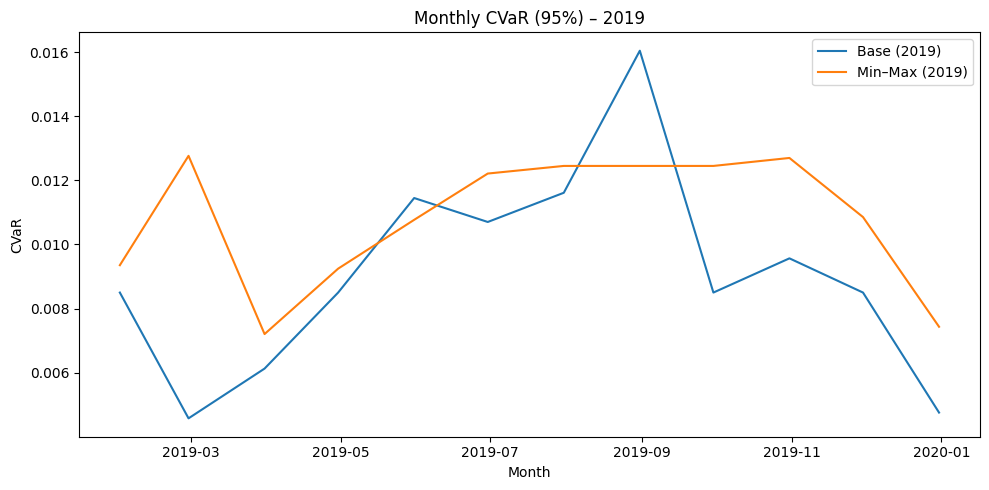

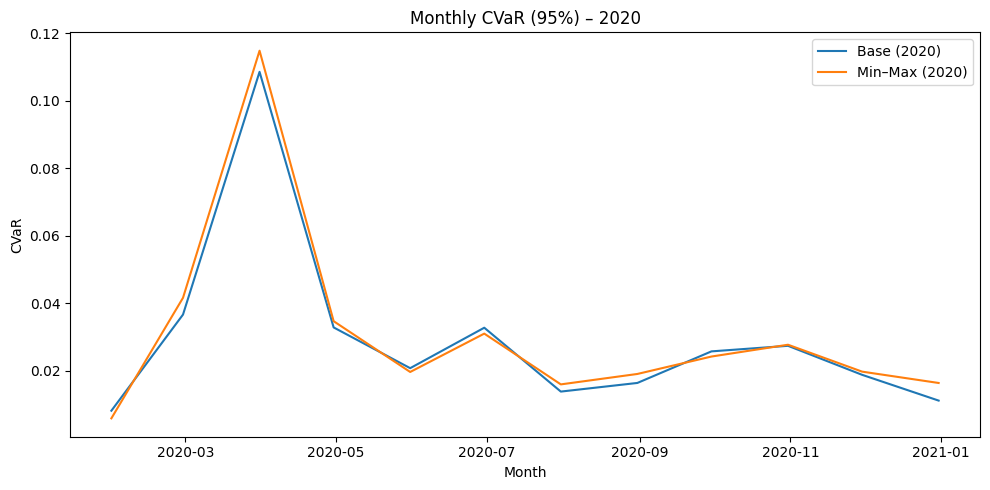

In [ ]:

# Build weight Series aligned to tickers
w_base = pd.Series(w2019, index=tickers)
w_q4   = pd.Series(x_opt_q4, index=tickers)

# Normalize (in case of tiny numeric drift)
w_base = w_base / w_base.sum()
w_q4   = w_q4 / w_q4.sum()

# Compute daily portfolio returns (dot product per day)
port_2019_base = (returns2019[tickers] * w_base).sum(axis=1)
port_2019_q4   = (returns2019[tickers] * w_q4).sum(axis=1)

port_2020_base = (returns2020[tickers] * w_base).sum(axis=1)
port_2020_q4   = (returns2020[tickers] * w_q4).sum(axis=1)

# Monthly CVaR series using your cvar_series()
def monthly_cvar_series(series, beta):
    s = series.copy()
    s.index = pd.to_datetime(s.index)
    return s.resample("M").apply(lambda x: cvar_series(x, beta)[1])  # [1] = CVaR

m_cvar_2019_base = monthly_cvar_series(port_2019_base, beta)
m_cvar_2019_q4   = monthly_cvar_series(port_2019_q4,   beta)
m_cvar_2020_base = monthly_cvar_series(port_2020_base, beta)
m_cvar_2020_q4   = monthly_cvar_series(port_2020_q4,   beta)

# Plot 2019 monthly CVaR
plt.figure(figsize=(10,5))
plt.plot(m_cvar_2019_base.index, m_cvar_2019_base.values, label="Base (2019)")
plt.plot(m_cvar_2019_q4.index,   m_cvar_2019_q4.values,   label="Min–Max (2019)")
plt.title(f"Monthly CVaR ({int(beta*100)}%) – 2019")
plt.xlabel("Month"); plt.ylabel("CVaR"); plt.legend(); plt.tight_layout(); plt.show()

# Plot 2020 monthly CVaR
plt.figure(figsize=(10,5))
plt.plot(m_cvar_2020_base.index, m_cvar_2020_base.values, label="Base (2020)")
plt.plot(m_cvar_2020_q4.index,   m_cvar_2020_q4.values,   label="Min–Max (2020)")
plt.title(f"Monthly CVaR ({int(beta*100)}%) – 2020")
plt.xlabel("Month"); plt.ylabel("CVaR"); plt.legend(); plt.tight_layout(); plt.show()


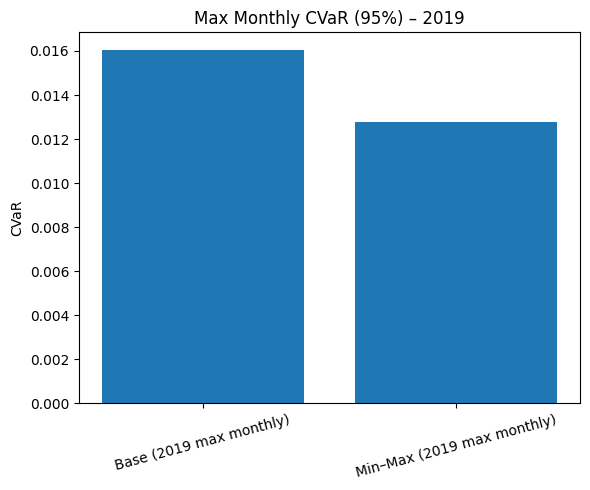

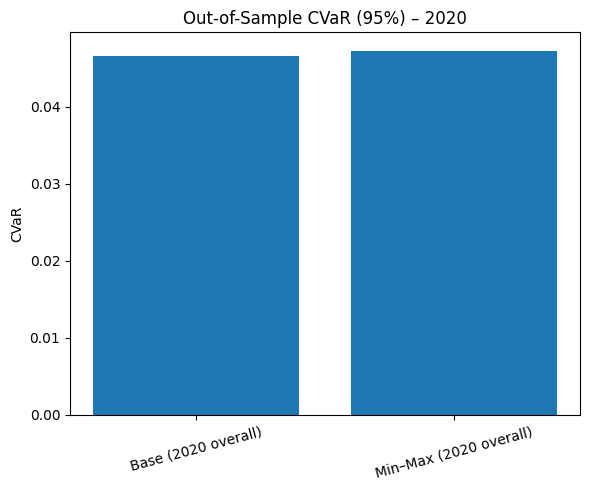

In [ ]:
# Max monthly CVaR in 2019
max_m_2019_base = float(m_cvar_2019_base.max())
max_m_2019_q4   = float(m_cvar_2019_q4.max())

# Overall out-of-sample CVaR in 2020 using your cvar_series()
_, cvar_2020_base = cvar_series(port_2020_base, beta)
_, cvar_2020_q4   = cvar_series(port_2020_q4,   beta)

# Bars: 2019 max monthly CVaR
plt.figure(figsize=(6,5))
plt.bar(["Base (2019 max monthly)", "Min–Max (2019 max monthly)"],
        [max_m_2019_base, max_m_2019_q4])
plt.title(f"Max Monthly CVaR ({int(beta*100)}%) – 2019")
plt.ylabel("CVaR"); plt.xticks(rotation=15); plt.tight_layout(); plt.show()

# Bars: 2020 overall CVaR
plt.figure(figsize=(6,5))
plt.bar(["Base (2020 overall)", "Min–Max (2020 overall)"],
        [cvar_2020_base, cvar_2020_q4])
plt.title(f"Out-of-Sample CVaR ({int(beta*100)}%) – 2020")
plt.ylabel("CVaR"); plt.xticks(rotation=15); plt.tight_layout(); plt.show()


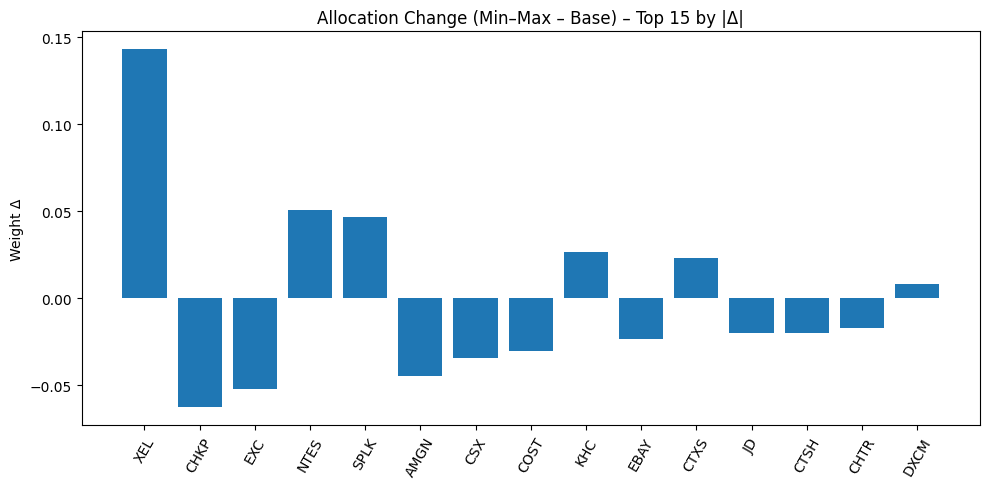

In [ ]:
# Differences in allocations (Min–Max minus Base), top 15 by absolute change
delta = (w_q4 - w_base).abs().sort_values(ascending=False).head(15).index

plt.figure(figsize=(10,5))
plt.bar(delta, (w_q4 - w_base).loc[delta].values)
plt.title("Allocation Change (Min–Max – Base) – Top 15 by |Δ|")
plt.ylabel("Weight Δ"); plt.xticks(rotation=60); plt.tight_layout(); plt.show()


# Q5

In [ ]:
ret19 = returns2019.drop('month', axis=1).copy()
ret19 = ret19.sort_index()
ret20 = returns2020.copy()
ret20 = ret20.sort_index()
ret_all = pd.concat([ret19, ret20]).sort_index()

beta = 0.95
R = 0.0002
monthly_records = []

months_2020 = pd.period_range("2020-01", "2020-12", freq="M")

for mon in months_2020:
  month_start = mon.to_timestamp(how="start")
  month_end   = mon.to_timestamp(how="end")
  train_start = (month_start - pd.DateOffset(years=1)).normalize()
  train_end   = (month_start - pd.Timedelta(days=1)).normalize()
  train_df = ret_all.loc[train_start:train_end]
  test_df  = ret_all.loc[month_start:month_end]
  mean_ret_win = train_df.mean().values
  w_m, alpha_m, cvar_m = solve_cvar(train_df, mean_ret_win, R, beta)
  VaR_m, CVaR_m = cvar_for_weights(test_df, w_m, beta=beta)
  monthly_records.append({
      "month": mon.strftime("%Y-%m"),
      "VaR": VaR_m,
      "CVaR": CVaR_m,
      "weights": w_m
  })

Gurobi Optimizer version 12.0.3 build v12.0.3rc0 (linux64 - "Ubuntu 22.04.4 LTS")

CPU model: AMD EPYC 7B12, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 252 rows, 351 columns and 25604 nonzeros
Model fingerprint: 0x2a87650d
Coefficient statistics:
  Matrix range     [2e-05, 1e+00]
  Objective range  [8e-02, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [2e-04, 1e+00]
Presolve time: 0.01s
Presolved: 252 rows, 351 columns, 25604 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0      handle free variables                          0s
     147    1.1089668e-02   0.000000e+00   0.000000e+00      0s

Solved in 147 iterations and 0.02 seconds (0.02 work units)
Optimal objective  1.108966829e-02
Gurobi Optimizer version 12.0.3 build v12.0.3rc0 (linux64 - "Ubuntu 22.04.4 LTS")

CPU model: AMD EPYC 7B12, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical core

In [ ]:
monthly_df = pd.DataFrame(
    [{"month": rec["month"], "VaR": rec["VaR"], "CVaR": rec["CVaR"]} for rec in monthly_records]
).set_index("month").sort_index()

avg_cvar = monthly_df["CVaR"].mean()
std_cvar = monthly_df["CVaR"].std()
min_month = (monthly_df["CVaR"].idxmin(), monthly_df["CVaR"].min())
max_month = (monthly_df["CVaR"].idxmax(), monthly_df["CVaR"].max())
print(f"Average CVaR: {avg_cvar:.6f}")
print(f"Std CVaR: {std_cvar:.6f}")
print(f"Min CVaR: {min_month[0]} ({min_month[1]:.6f})")
print(f"Max CVaR: {max_month[0]} ({max_month[1]:.6f})")
monthly_df

Average CVaR: 0.032334
Std CVaR: 0.023869
Min CVaR: 2020-01 (0.008140)
Max CVaR: 2020-03 (0.101672)


,VaR,CVaR
month,,
2020-01,0.006277,0.008140
2020-02,0.026397,0.036243
2020-03,0.074269,0.101672
2020-04,0.033241,0.041765
2020-05,0.020417,0.029995
2020-06,0.007842,0.026372
2020-07,0.013803,0.032320
2020-08,0.014435,0.016165
2020-09,0.032770,0.034410


It does seem like it is worthwhile to re optimize on a rolling month to month basis as the average tail loss is is lower than the loss over the entire 2019 year training. The rolling also is able to show statistics like the standard deviation of the CVAR which is .024. It also shows the volatility from month to month with a safe month of January 2020 and a high month of March 2020.

#Q6

In [ ]:
records = []
for rec in monthly_records:
  wt_m = sorted(zip(tickers, rec["weights"]))
  row = {"month": rec["month"], **dict(wt_m)}
  records.append(row)
monthly_weights = pd.DataFrame(records).set_index("month")
monthly_weights

,AAPL,ADBE,ADI,ADP,ADSK,ALGN,ALXN,AMAT,AMD,AMGN,...,TXN,ULTA,VRSK,VRSN,VRTX,WBA,WDAY,WDC,XEL,XLNX
month,,,,,,,,,,,,,,,,,,,,,
2020-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.080766,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.303917,0.0
2020-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.085763,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.298155,0.0
2020-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.332126,0.0
2020-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2020-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2020-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2020-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001756,0.0
2020-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2020-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [ ]:
dw = monthly_weights.diff().abs()
violations = (dw > 0.051)
if violations.any().any():
    print("\nViolations (month, asset, |Δw|):")
    for (month, asset), flag in violations.stack().items():
        if flag:
            print(f"  {month}  {asset}  {dw.loc[month, asset]:.4f}")


Violations (month, asset, |Δw|):
  2020-03  AMGN  0.0858
  2020-03  CTXS  0.0707
  2020-03  DXCM  0.0575
  2020-03  EXC  0.0657
  2020-03  KHC  0.0764
  2020-04  CHKP  0.0896
  2020-04  CHTR  0.2967
  2020-04  CTXS  0.4517
  2020-04  GILD  0.1548
  2020-04  INCY  0.0919
  2020-04  KHC  0.1112
  2020-04  MAR  0.1036
  2020-04  PDD  0.0590
  2020-04  XEL  0.3321
  2020-05  COST  0.1439
  2020-05  CTXS  0.2043
  2020-05  EBAY  0.1583
  2020-05  GILD  0.0744
  2020-05  PDD  0.0725
  2020-06  CTXS  0.1958
  2020-06  MRNA  0.0610
  2020-06  NTES  0.1018
  2020-06  PDD  0.0747
  2020-07  DLTR  0.0748
  2020-07  MAR  0.0749
  2020-08  CERN  0.0840
  2020-08  COST  0.1305
  2020-08  EBAY  0.0661
  2020-09  COST  0.2900
  2020-09  DLTR  0.0606
  2020-09  DOCU  0.1258
  2020-09  EBAY  0.1677
  2020-09  GILD  0.1076
  2020-09  MRNA  0.0626
  2020-09  NTES  0.1064
  2020-09  PDD  0.0599
  2020-10  CERN  0.0798
  2020-10  COST  0.1959
  2020-10  DOCU  0.1258
  2020-10  EBAY  0.0823
  2020-10  INCY 

In [ ]:
def solve_cvar_new(Y_df, mean_ret, R_min, beta, w_prev=None, eps = .05):
  q, n = Y_df.shape
  coeff = 1 / ((1 - beta) * q)

  m = gp.Model(f"beta_{beta}")
  x2 = m.addVars(n, lb=0, ub=1, name="x")
  a  = m.addVar(lb=-gp.GRB.INFINITY, name="alpha")
  u  = m.addVars(q, lb=0, name="u")

  m.setObjective(a + coeff * gp.quicksum(u[k] for k in range(q)), gp.GRB.MINIMIZE)
  m.addConstr(gp.quicksum(x2[j] for j in range(n)) == 1)
  m.addConstr(gp.quicksum(mean_ret[j] * x2[j] for j in range(n)) >= R_min)

  Y = Y_df.values
  for k in range(q):
    m.addConstr(u[k] >= -gp.quicksum(Y[k, j] * x2[j] for j in range(n)) - a)

  if w_prev is not None:
    for j in range(n):
      m.addConstr(x2[j] <= float(w_prev[j]) + eps)
      m.addConstr(x2[j] >= float(w_prev[j]) - eps)
  m.optimize()
  w = np.array([x2[j].X for j in range(n)])
  return w, a.X, m.ObjVal


In [ ]:
w_prev = None
monthly_records_new = []
for mon in months_2020:
  month_start = mon.to_timestamp(how="start")
  month_end   = mon.to_timestamp(how="end")
  train_start = (month_start - pd.DateOffset(years=1)).normalize()
  train_end   = (month_start - pd.Timedelta(days=1)).normalize()
  train_df = ret_all.loc[train_start:train_end]
  test_df  = ret_all.loc[month_start:month_end]
  mean_ret_win = train_df.mean().values
  w_m, alpha_m, cvar_m = solve_cvar_new(train_df, mean_ret_win, R, beta, w_prev, .05)
  VaR_m, CVaR_m = cvar_for_weights(test_df, w_m, beta=beta)
  monthly_records_new.append({
      "month": mon.strftime("%Y-%m"),
      "VaR": VaR_m,
      "CVaR": CVaR_m,
      "weights": w_m
  })
  w_prev = w_m

Gurobi Optimizer version 12.0.3 build v12.0.3rc0 (linux64 - "Ubuntu 22.04.4 LTS")

CPU model: AMD EPYC 7B12, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 252 rows, 351 columns and 25604 nonzeros
Model fingerprint: 0x2a87650d
Coefficient statistics:
  Matrix range     [2e-05, 1e+00]
  Objective range  [8e-02, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [2e-04, 1e+00]
Presolve time: 0.01s
Presolved: 252 rows, 351 columns, 25604 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0      handle free variables                          0s
     147    1.1089668e-02   0.000000e+00   0.000000e+00      0s

Solved in 147 iterations and 0.02 seconds (0.02 work units)
Optimal objective  1.108966829e-02
Gurobi Optimizer version 12.0.3 build v12.0.3rc0 (linux64 - "Ubuntu 22.04.4 LTS")

CPU model: AMD EPYC 7B12, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical core

In [ ]:
monthly_df_new = pd.DataFrame(
    [{"month": rec["month"], "VaR": rec["VaR"], "CVaR": rec["CVaR"]} for rec in monthly_records_new]
).set_index("month").sort_index()
avg_cvar = monthly_df_new["CVaR"].mean()
std_cvar = monthly_df_new["CVaR"].std()
min_month = (monthly_df_new["CVaR"].idxmin(), monthly_df["CVaR"].min())
max_month = (monthly_df_new["CVaR"].idxmax(), monthly_df["CVaR"].max())
print(f"Average CVaR: {avg_cvar:.6f}")
print(f"Std CVaR: {std_cvar:.6f}")
print(f"Min CVaR: {min_month[0]} ({min_month[1]:.6f})")
print(f"Max CVaR: {max_month[0]} ({max_month[1]:.6f})")
monthly_df_new

Average CVaR: 0.030709
Std CVaR: 0.023194
Min CVaR: 2020-01 (0.008140)
Max CVaR: 2020-03 (0.101672)


,VaR,CVaR
month,,
2020-01,0.006277,0.008140
2020-02,0.026397,0.036243
2020-03,0.074481,0.098843
2020-04,0.020192,0.022616
2020-05,0.022556,0.029735
2020-06,0.011050,0.025442
2020-07,0.013484,0.037714
2020-08,0.013765,0.015488
2020-09,0.030294,0.033344


In [ ]:
records = []
for rec in monthly_records_new:  # each rec has "month" and "weights"
  wt_m = sorted(zip(tickers, rec["weights"]))
  row = {"month": rec["month"], **dict(wt_m)}  # dict turns pairs into {ticker: weight}
  records.append(row)
monthly_weights_new = pd.DataFrame(records).set_index("month")
monthly_weights_new

,AAPL,ADBE,ADI,ADP,ADSK,ALGN,ALXN,AMAT,AMD,AMGN,...,TXN,ULTA,VRSK,VRSN,VRTX,WBA,WDAY,WDC,XEL,XLNX
month,,,,,,,,,,,,,,,,,,,,,
2020-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.080766,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.303917,0.0
2020-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.085763,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.298155,0.0
2020-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.035763,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.305783,0.0
2020-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.255783,0.0
2020-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.205783,0.0
2020-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.155783,0.0
2020-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.105783,0.0
2020-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.055783,0.0
2020-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.005783,0.0


In [ ]:
dw = monthly_weights_new.diff().abs()
violations = (dw > 0.051)
if violations.any().any():
    print("\nViolations (month, asset, |Δw|):")
    for (month, asset), flag in violations.stack().items():
        if flag:
            print(f"  {month}  {asset}  {dw.loc[month, asset]:.4f}")

The sequence of portfolios we found ended up not being stable as there were multiple stocks that had a change in weight of more than .05 from one month to the next month. How we added constraints here was to use the previous month in our for loop and pass that as a constraint to our gurobi optimizer. Then in the gurobi constraint we put that the weight can not be plus or minus .05 from the previous constraint. This way we enforce that the change from one month to the next month is less than .05 and therefore is stable.

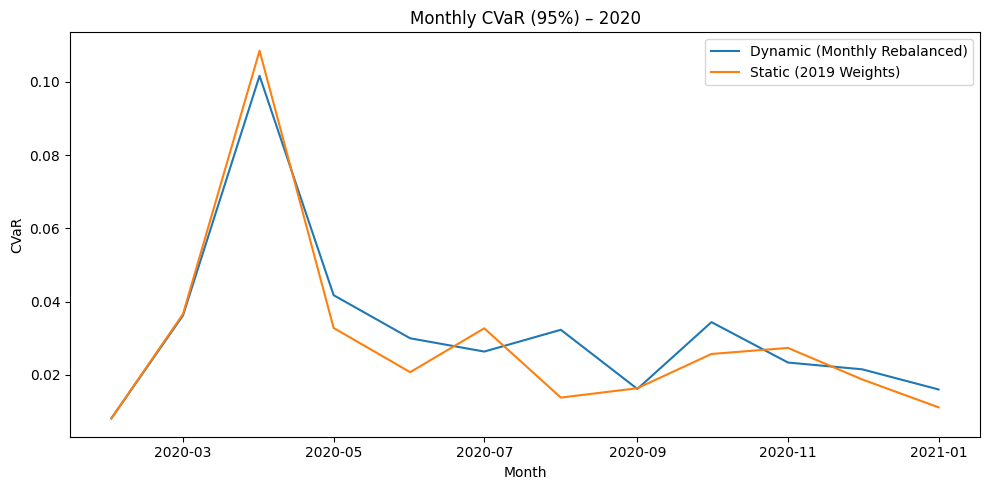

/tmp/ipython-input-3362615369.py:78: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([dyn_cvar.values, sta_cvar.values], labels=["Dynamic","Static"])


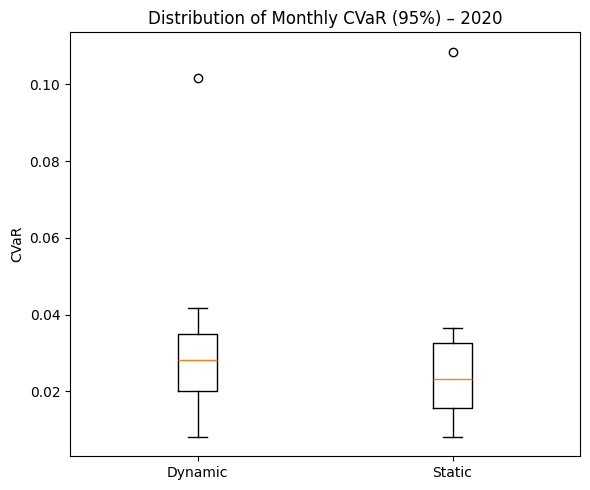

                               Dynamic CVaR  Static CVaR  Diff (Dyn - Sta)
2020-01-31 23:59:59.999999999      0.008140     0.008140          0.000000
2020-02-29 23:59:59.999999999      0.036243     0.036617         -0.000374
2020-03-31 23:59:59.999999999      0.101672     0.108519         -0.006846
2020-04-30 23:59:59.999999999      0.041765     0.032812          0.008953
2020-05-31 23:59:59.999999999      0.029995     0.020742          0.009253
2020-06-30 23:59:59.999999999      0.026372     0.032724         -0.006352
2020-07-31 23:59:59.999999999      0.032320     0.013805          0.018515
2020-08-31 23:59:59.999999999      0.016165     0.016363         -0.000198
2020-09-30 23:59:59.999999999      0.034410     0.025716          0.008694
2020-10-31 23:59:59.999999999      0.023374     0.027366         -0.003992
2020-11-30 23:59:59.999999999      0.021530     0.018773          0.002757
2020-12-31 23:59:59.999999999      0.016021     0.011136          0.004884

Overall stats:
Dynamic: 

In [ ]:


# ---------- setup ----------
# Ensure benchmark column not accidentally included in portfolio
cols = [c for c in tickers if c in returns2020.columns and c != "NDX"]
R20 = returns2020[cols].copy()
R20.index = pd.to_datetime(R20.index)

# Month list from data (safer than hardcoding)
months_2020 = pd.period_range(R20.index.min().to_period("M"),
                              R20.index.max().to_period("M"), freq="M")
months_2020 = [m for m in months_2020 if m.start_time.year == 2020]

# Base/static weights as Series aligned to tickers
w_base = pd.Series(w2019, index=tickers).reindex(cols).fillna(0.0)
if w_base.sum() != 0:
    w_base = w_base / w_base.sum()

# Helper: fetch dynamic weights for a given month from your monthly_weights
def get_dynamic_weights_for_month(mon):
    """
    Returns a pd.Series of weights aligned to `cols` for the given month Period('2020-xx').
    Supports either:
      - monthly_weights has a column 'weights' with a 1D array per row, or
      - monthly_weights has one column per ticker.
    """
    row = monthly_weights.loc[mon] if mon in monthly_weights.index else monthly_weights.loc[str(mon)]
    if isinstance(row, pd.DataFrame):
        # if multiindex or duplicate month rows, take the first
        row = row.iloc[0]

    if "weights" in monthly_weights.columns:
        # array stored in a single column
        w = pd.Series(np.array(row["weights"]), index=tickers)
    else:
        # wide format: columns are tickers
        w = row.reindex(tickers).astype(float)
    w = w.reindex(cols).fillna(0.0)
    if w.sum() != 0:
        w = w / w.sum()
    return w

# ---------- compute monthly CVaR series (dynamic vs static) ----------
dyn_cvar = []
sta_cvar = []
idx = []

for mon in months_2020:
    # slice month’s returns
    mret = R20.loc[mon.start_time: mon.end_time]

    # dynamic weights for this month
    w_dyn = get_dynamic_weights_for_month(mon)

    # daily portfolio returns
    port_dyn = (mret * w_dyn).sum(axis=1)
    port_sta = (mret * w_base).sum(axis=1)

    # CVaR using your function (VaR, CVaR)
    _, cvar_dyn = cvar_series(port_dyn, beta)
    _, cvar_sta = cvar_series(port_sta, beta)

    dyn_cvar.append(cvar_dyn)
    sta_cvar.append(cvar_sta)
    idx.append(mon.end_time)

dyn_cvar = pd.Series(dyn_cvar, index=idx, name="Dynamic CVaR")
sta_cvar = pd.Series(sta_cvar, index=idx, name="Static CVaR")

# ---------- 1) Line chart ----------
plt.figure(figsize=(10,5))
plt.plot(dyn_cvar.index, dyn_cvar.values, label="Dynamic (Monthly Rebalanced)")
plt.plot(sta_cvar.index, sta_cvar.values, label="Static (2019 Weights)")
plt.title(f"Monthly CVaR ({int(beta*100)}%) – 2020")
plt.xlabel("Month"); plt.ylabel("CVaR"); plt.legend()
plt.tight_layout(); plt.show()

# ---------- 2) Boxplot of monthly CVaR distributions ----------
plt.figure(figsize=(6,5))
plt.boxplot([dyn_cvar.values, sta_cvar.values], labels=["Dynamic","Static"])
plt.title(f"Distribution of Monthly CVaR ({int(beta*100)}%) – 2020")
plt.ylabel("CVaR")
plt.tight_layout(); plt.show()

# ---------- 3) Summary table (per month + overall stats) ----------
summary = pd.DataFrame({
    "Dynamic CVaR": dyn_cvar,
    "Static CVaR":  sta_cvar,
    "Diff (Dyn - Sta)": dyn_cvar - sta_cvar
})
print(summary.round(6).to_string())

print("\nOverall stats:")
print(f"Dynamic: mean={dyn_cvar.mean():.6f}, std={dyn_cvar.std():.6f}, min={dyn_cvar.min():.6f}, max={dyn_cvar.max():.6f}")
print(f"Static : mean={sta_cvar.mean():.6f}, std={sta_cvar.std():.6f}, min={sta_cvar.min():.6f}, max={sta_cvar.max():.6f}")
